In [1]:
import skimage
from skimage import data
from skimage.util import random_noise

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
bird = mpimg.imread("datasets/images/bird.jpeg")

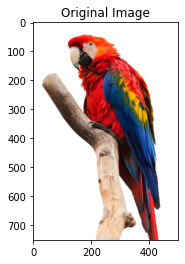

In [3]:
plt.title("Original Image")
plt.imshow(bird)

In [4]:
bird.shape

(750, 500, 3)

In [5]:
bird[200:250, 200:250]

array([[[157,   9,   9],
        [176,  26,  28],
        [185,  30,  36],
        ...,
        [ 55,  91, 165],
        [ 45,  84, 149],
        [ 61, 100, 159]],

       [[148,   5,   7],
        [163,  18,  21],
        [170,  21,  27],
        ...,
        [ 64,  93, 169],
        [ 50,  85, 151],
        [ 64, 100, 162]],

       [[139,   3,   5],
        [149,  10,  15],
        [152,   9,  15],
        ...,
        [ 67,  90, 168],
        [ 53,  86, 155],
        [ 66, 101, 165]],

       ...,

       [[198,  25,  18],
        [207,  28,  23],
        [212,  27,  24],
        ...,
        [ 28,  57, 123],
        [ 40,  47, 117],
        [ 40,  49, 116]],

       [[200,  26,  19],
        [210,  31,  26],
        [217,  34,  30],
        ...,
        [ 25,  53, 118],
        [ 35,  44, 113],
        [ 33,  44, 110]],

       [[200,  26,  19],
        [208,  29,  24],
        [214,  32,  29],
        ...,
        [ 29,  54, 118],
        [ 34,  45, 111],
        [ 30,  46, 108]]

In [6]:
bird_reshape = bird.reshape(bird.shape[0], -1)
bird_reshape.shape

(750, 1500)

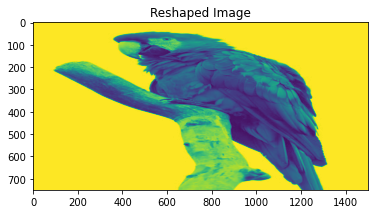

In [7]:
plt.figure(figsize=(6, 6))
plt.title("Reshaped Image")
plt.imshow(bird_reshape)

In [8]:
bird_resized = skimage.transform.resize(bird, (500, 500))
bird_resized.shape

(500, 500, 3)

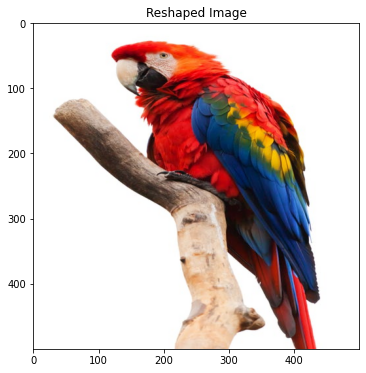

In [9]:
plt.figure(figsize=(6, 6))
plt.title("Reshaped Image")
plt.imshow(bird_resized)

In [10]:
aspect_ratio_original = bird.shape[1] / float(bird.shape[0])
aspect_ratio_resized = bird_resized.shape[1] / float(bird_resized.shape[0])

print("Original aspect ratio: ", aspect_ratio_original)
print("Resized aspect ratio: ", aspect_ratio_resized)

Original aspect ratio:  0.6666666666666666
Resized aspect ratio:  1.0


In [11]:
bird_rescaled = skimage.transform.rescale(bird_resized,
                                          (1.0, aspect_ratio_original),
                                          channel_axis=2)
bird_rescaled.shape

(500, 333, 3)

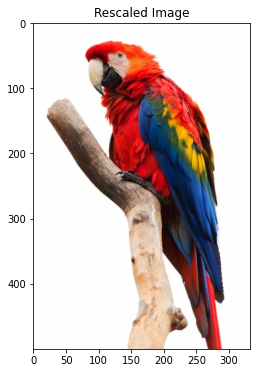

In [12]:
plt.figure(figsize=(6, 6))
plt.title("Rescaled Image")
plt.imshow(bird_rescaled)

In [13]:
aspect_ratio_rescaled = bird_rescaled.shape[1] / float(bird_rescaled.shape[0])

print("Rescaled aspect ratio: ", aspect_ratio_rescaled)

Rescaled aspect ratio:  0.666


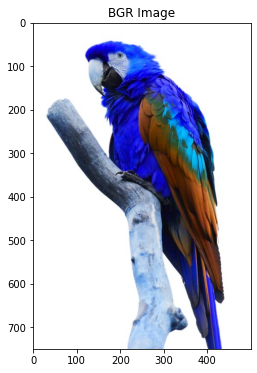

In [14]:
bird_BGR = bird[:, :, (2, 1, 0)]

plt.figure(figsize=(6, 6))
plt.title("BGR Image")
plt.imshow(bird_BGR)

In [15]:
bird_BGR.shape

(750, 500, 3)

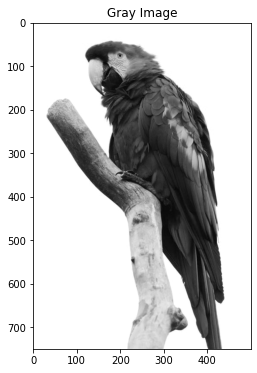

In [16]:
bird_gray = skimage.color.rgb2gray(bird)

plt.figure(figsize=(6, 6))
plt.title("Gray Image")
plt.imshow(bird_gray, cmap='gray')

In [17]:
bird_gray.shape

(750, 500)

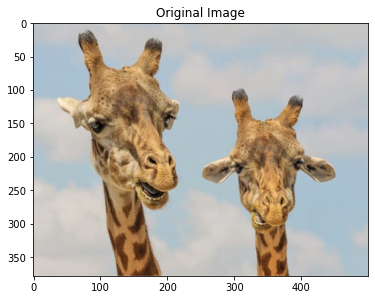

In [18]:
giraffes = skimage.img_as_float(
    skimage.io.imread('datasets/images/giraffes.jpg')).astype(np.float32)

plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(giraffes)

In [19]:
giraffes.shape

(378, 500, 3)

In [20]:
def crop(image, cropx, cropy):
    y, x, c = image.shape

    startx = x // 2 - (cropx // 8)
    starty = y // 3 - (cropy // 4)

    stopx = startx + cropx
    stopy = starty + 2 * cropy

    return image[starty:stopy, startx:stopx]

In [21]:
giraffes_cropped = crop(giraffes, 256, 256)

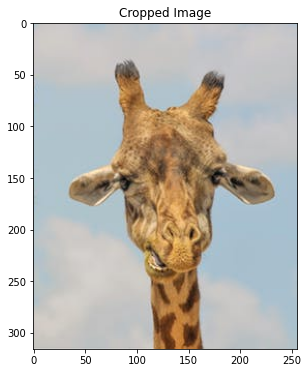

In [22]:
plt.figure(figsize=(6, 6))
plt.title("Cropped Image")
plt.imshow(giraffes_cropped)